## Supervised Machine Learning: Regression

## 2- Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# This option ensures that the graphs created are displayed within the notebook

%matplotlib inline

In [3]:
# create path
path=r'C:\Users\Jatin\Documents\ApartmentRentalInGermany'

In [4]:
df=pd.read_csv(os.path.join(path,'Data','Prepared Data','df_immo.csv'))

## 3- Clean data

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,state,serviceCharge,heatingType,newlyConstructed,balcony,totalRent,yearConstructed,hasKitchen,...,typeOfFlat,geo_plz,numberOfRooms,floor,garden,district,city,date,Rent_livingSpace,Rent_yearConstructed
0,0,0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0,1965,False,...,ground_floor,44269,4,1,True,Dortmund,Schüren,May19,Low price,Middle price1
1,1,1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,902.0,1871,False,...,ground_floor,67459,3,2,False,Rhein_Pfalz_Kreis,Böhl_Iggelheim,May19,Low price,Low price1
2,2,2,Sachsen,255.00,floor_heating,True,True,1300.0,2019,False,...,apartment,1097,3,3,False,Dresden,Äußere_Neustadt_Antonstadt,Oct19,Low price,High price1
3,3,3,Sachsen,58.15,district_heating,False,True,902.0,1964,False,...,other,9599,3,3,False,Mittelsachsen_Kreis,Freiberg,May19,Low price,Middle price1
4,4,4,Bremen,138.00,self_contained_central_heating,False,True,903.0,1950,False,...,apartment,28213,3,1,False,Bremen,Neu_Schwachhausen,Feb20,Low price,Middle price1


In [6]:
df.shape

(264874, 25)

In [7]:
# drop unnamed columns from prepared data
df = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1'])

In [8]:
df.head()

,state,serviceCharge,heatingType,newlyConstructed,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,...,typeOfFlat,geo_plz,numberOfRooms,floor,garden,district,city,date,Rent_livingSpace,Rent_yearConstructed
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0,1965,False,True,595.0,...,ground_floor,44269,4,1,True,Dortmund,Schüren,May19,Low price,Middle price1
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,902.0,1871,False,False,800.0,...,ground_floor,67459,3,2,False,Rhein_Pfalz_Kreis,Böhl_Iggelheim,May19,Low price,Low price1
2,Sachsen,255.00,floor_heating,True,True,1300.0,2019,False,True,965.0,...,apartment,1097,3,3,False,Dresden,Äußere_Neustadt_Antonstadt,Oct19,Low price,High price1
3,Sachsen,58.15,district_heating,False,True,902.0,1964,False,False,343.0,...,other,9599,3,3,False,Mittelsachsen_Kreis,Freiberg,May19,Low price,Middle price1
4,Bremen,138.00,self_contained_central_heating,False,True,903.0,1950,False,False,765.0,...,apartment,28213,3,1,False,Bremen,Neu_Schwachhausen,Feb20,Low price,Middle price1


In [9]:
# Checking for mixed type data
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

heatingType
condition
typeOfFlat


In [10]:
# Updating heatingType column data type to string
df['heatingType']=df['heatingType'].astype('str')

In [11]:
# Updating condition column data type to string
df['condition']=df['condition'].astype('str')

In [12]:
# Updating typeOfFlat column data type to string
df['typeOfFlat']=df['typeOfFlat'].astype('str')

In [13]:
# Checking for mixed type data again
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

No mixed type data found.

In [14]:
# Checking for missing values
df.isnull().sum()

state                   0
serviceCharge           0
heatingType             0
newlyConstructed        0
balcony                 0
totalRent               0
yearConstructed         0
hasKitchen              0
cellar                  0
baseRent                0
livingSpace             0
condition               0
lift                    0
typeOfFlat              0
geo_plz                 0
numberOfRooms           0
floor                   0
garden                  0
district                0
city                    0
date                    0
Rent_livingSpace        0
Rent_yearConstructed    0
dtype: int64

In [15]:
# Creating a subset that contain only rows with duplicate values
df_dups = df[df.duplicated()]

No missing and duplicated values found.

## extreme values check

C:\Users\Jatin\AppData\Local\Temp\ipykernel_9880\1388641755.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['livingSpace'], bins=25) # Shows extreme values


<Axes: xlabel='livingSpace', ylabel='Density'>

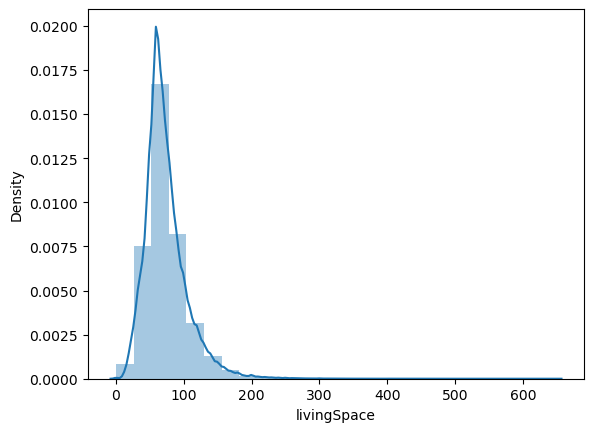

In [16]:
sns.distplot(df['livingSpace'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [17]:
df['livingSpace'].mean()

73.48566843102759

In [18]:
df['livingSpace'].median()

67.36

In [19]:
df['livingSpace'].max()

649.0

C:\Users\Jatin\AppData\Local\Temp\ipykernel_9880\1536236967.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['yearConstructed'], bins=25) # Shows extreme values


<Axes: xlabel='yearConstructed', ylabel='Density'>

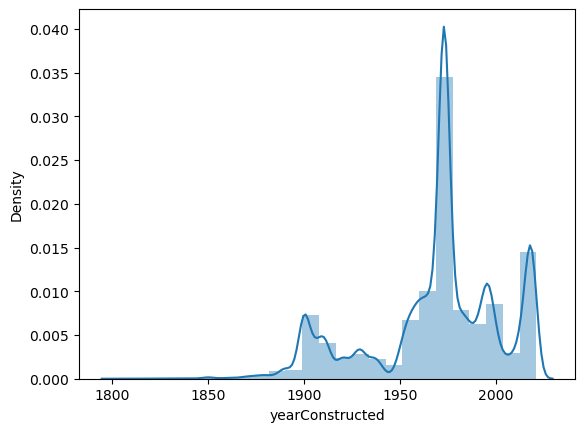

In [20]:
sns.distplot(df['yearConstructed'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

## 4- Data preparation for regression analysis

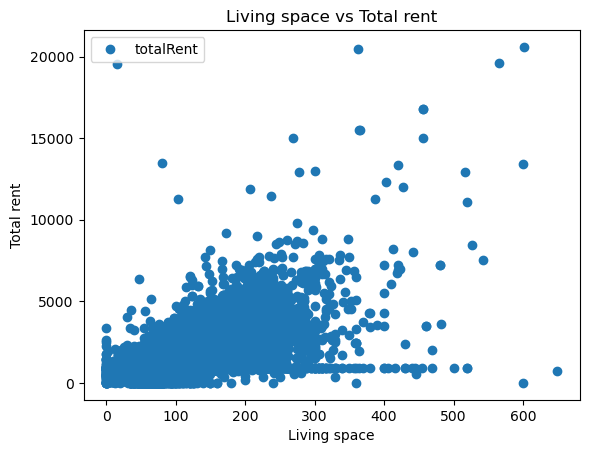

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'livingSpace', y='totalRent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Living space vs Total rent')  
plt.xlabel('Living space')  
plt.ylabel('Total rent')  
plt.show()

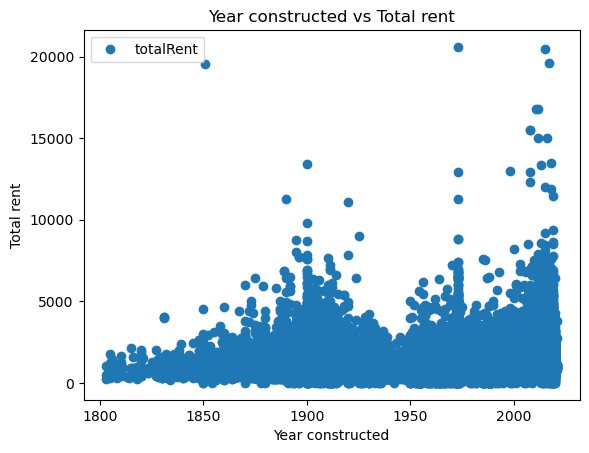

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'yearConstructed', y='totalRent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Year constructed vs Total rent')  
plt.xlabel('Year constructed')  
plt.ylabel('Total rent')  
plt.show()

## 5- Hypothesis: 

1. Properties constructed in more recent years demand higher rents due to better amenities.

2. There is a positive correlation between the size of living space and rental price, indicating that larger properties tends to higher rents.

## 6- Reshaping variables into Numpy arrays

In [23]:
# Visualizing relationship between living space and total rent

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['livingSpace'].values.reshape(-1,1)
y = df['totalRent'].values.reshape(-1,1)

In [25]:
X

array([[86. ],
       [89. ],
       [83.8],
       ...,
       [95. ],
       [70. ],
       [77. ]])

In [26]:
y

array([[ 840.],
       [ 902.],
       [1300.],
       ...,
       [ 930.],
       [1015.],
       [ 902.]])

## 7- Spliting data

In [27]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 8- Running Linear regression

In [28]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [29]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## 9- Create a plot that shows regression line on the test set

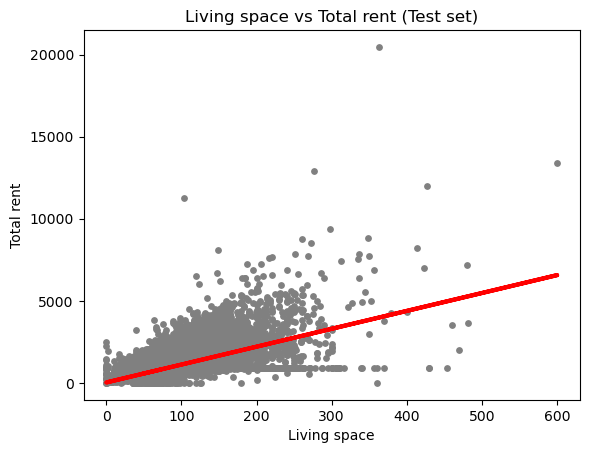

In [31]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Living space vs Total rent (Test set)')
plot_test.xlabel('Living space')
plot_test.ylabel('Total rent')
plot_test.show()

The Regression line almost fit the data, however the maximum data points are far from the trend line. Before interpreting, I would see the regression line in training set first.

## 11- Model performance statistics

In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[10.89928355]]
Mean squared error:  146346.8152208594
R2 score:  0.44857320853009786


In [34]:
y_predicted

array([[ 801.87346544],
       [ 299.41649401],
       [ 574.51441069],
       ...,
       [1204.05702825],
       [ 575.71333188],
       [ 560.99929909]])

## 12- Comparing the predicted y values with the actual y values

In [35]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1105.00,801.873465
1,902.00,299.416494
2,552.00,574.514411
3,3290.00,1247.654162
4,1180.00,1084.164909
5,670.00,680.891418
6,385.00,549.010087
7,902.00,1126.454129
8,846.65,738.766614
9,824.61,1007.215967


## Compare how the regression fits the training set

In [36]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [37]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[10.89928355]]
Mean squared error:  152140.96378925987
R2 score:  0.44516146692304115


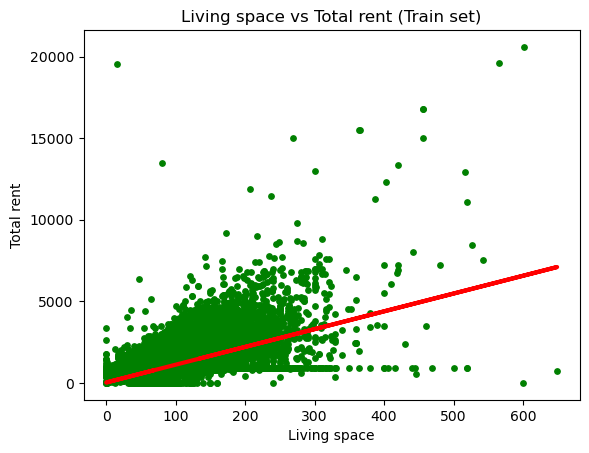

In [39]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Living space vs Total rent (Train set)')
plot_test.xlabel('Living space')
plot_test.ylabel('Total rent')
plot_test.show()

The model outcome on the training set is similar to that of the one we have in the test set. The line fits the data but it is still not a good fit and it shows that there is not a good linear relationship between these two variables. In detail, the Mean squared error is huge regarding the data we have which shows the regression line is not an actual representation of the data. The R2 score is only 0.44, which indicates that this relationship isn’t that great of a fit either. Also, there’s difference between the actual and predicted y values which shows that model isn’t doing a great job of explaining the relationship between these two variables. It confirms that relatioship is not purely linear.

## Bonus Task

In [40]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['livingSpace'] <=300] 

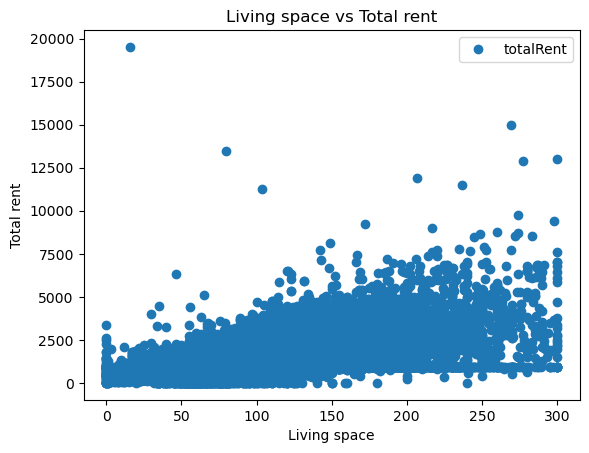

In [43]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_test.plot(x = 'livingSpace', y='totalRent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Living space vs Total rent')  
plt.xlabel('Living space')  
plt.ylabel('Total rent')  
plt.show()

In [44]:
# Reshape again.

X_2 = df_test['livingSpace'].values.reshape(-1,1)
y_2 = df_test['totalRent'].values.reshape(-1,1)

In [45]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [46]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [47]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [48]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[10.73186962]]
Mean squared error:  138184.06628764636
R2 score:  0.44975113521780563


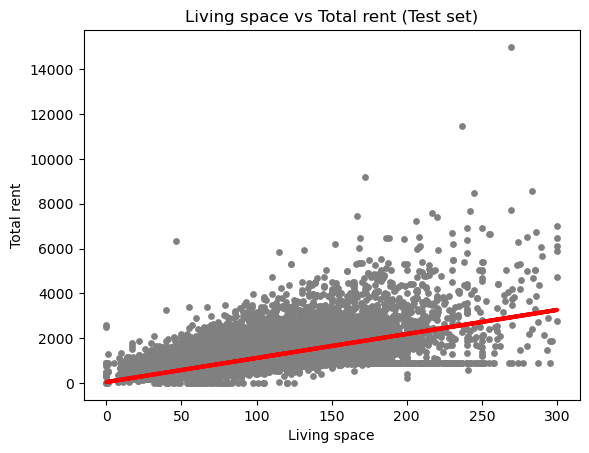

In [50]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Living space vs Total rent (Test set)')
plot_test.xlabel('Living space')
plot_test.ylabel('Total rent')
plot_test.show()

In [51]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,902.00,1326.837674
1,1180.00,1305.373935
2,1331.14,967.105405
3,1016.73,886.831020
4,370.00,629.266149
5,1660.00,1283.910196
6,1115.00,811.707933
7,520.00,564.874931
8,425.00,498.659296
9,950.00,1380.497023


There is no significant difference when ourliers are removed.

In [52]:
# visualizing relationship between year of construction and living space.

In [53]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['yearConstructed'].values.reshape(-1,1)
y = df['totalRent'].values.reshape(-1,1)

In [54]:
X

array([[1965],
       [1871],
       [2019],
       ...,
       [1965],
       [2019],
       [1972]], dtype=int64)

In [55]:
y

array([[ 840.],
       [ 902.],
       [1300.],
       ...,
       [ 930.],
       [1015.],
       [ 902.]])

In [56]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [57]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [58]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [59]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

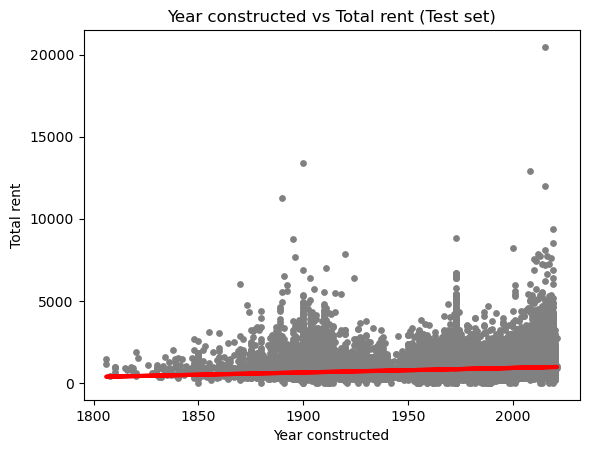

In [60]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year constructed vs Total rent (Test set)')
plot_test.xlabel('Year constructed')
plot_test.ylabel('Total rent')
plot_test.show()

In [61]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [62]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.75550233]]
Mean squared error:  256669.26434980377
R2 score:  0.03288425719578636


In [63]:
y_predicted

array([[951.62118892],
       [891.00013776],
       [902.02214707],
       ...,
       [838.64559359],
       [637.49392385],
       [838.64559359]])

In [64]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1105.00,951.621189
1,902.00,891.000138
2,552.00,902.022147
3,3290.00,937.843677
4,1180.00,921.310663
5,670.00,838.645594
6,385.00,904.777649
7,902.00,962.643198
8,846.65,813.846073
9,824.61,902.022147


In [65]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [66]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [67]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.75550233]]
Mean squared error:  265332.83729462646
R2 score:  0.032365258145614195


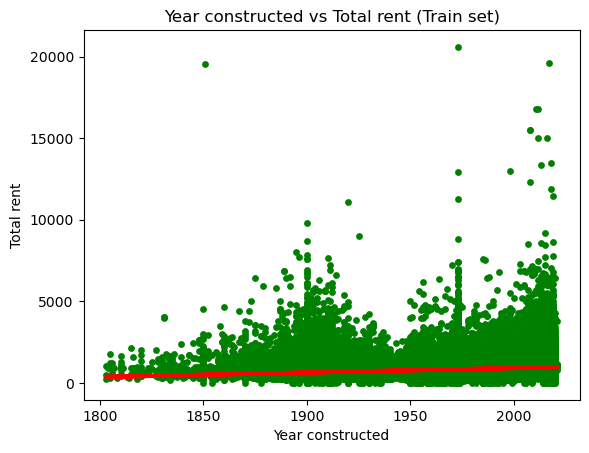

In [68]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Year constructed vs Total rent (Train set)')
plot_test.xlabel('Year constructed')
plot_test.ylabel('Total rent')
plot_test.show()

The regression line on the train set between varaiables 'year of construction' and 'total rent' cover very few data points which shows that there is week linear relationship between these two variables. The Mean squared error is also huge regarding the data we have, which shows the regression line is not an actual representation of the data. The R2 score is only 0.03, which indicates that this relationship isn’t that great of a fit either. Also, there’s big difference between the actual and predicted y values which shows that model isn’t doing a great job of explaining the relationship between these two variables. It confirms that relatioship is not purely linear.

## Conclusion:

Based on the analysis, it becomes evident that the 'year of construction' does not serve as a significant determinant for predicting the total rent of states.
The findings suggest that the 'living space' variable might hold more relevance in predicting the total rent of states.
The analysis opens the door to the consideration of additional factors, such as heating type, balcony, type of flat etc. which may offer better insights into the total rent dynamics of the states."